In [1]:
from sympy import *
import sympy
import random
from sympy.core.symbol import symbols
from sympy.solvers.solveset import nonlinsolve
from lib import *
init_printing()
a, b, c, d,d1,d2, d3 = symbols('a, b, c, d, d1, d2, d3')
a0, a1,a2,a3,  b1, c1 = symbols('a0, a1, a2, a3, b1, c1')
m, L, H0 = symbols('m, L, H0')
x, y = symbols('x, y')
v0, v1 = symbols('v0, v1')

In [2]:
H0_, L_ = 1, 10
m_, v0_ = 1, 1
H = H0 -  0.1 *(2 * x / L_  - 1) ** 2
# v1 = v0 * 12/5
# vx = (v0 + ((a0  + a1 * x) **  2) * x * (L - x)) * (H ** 2 - y ** 2)
vx =  v0 * (1- x/L) + v1 *(H**2-y**2)*(x/L)  + (1-x**2/L**2)*(H ** 2 - y ** 2) * (a0)
p = - d1 * x + d2 * x **2
print("vx=", vx)
print("p=", p)
# checking profiles
print("vx(0, y)", substitute(vx, [x], [0]))  
print("vx(L, y)", substitute(vx, [x], [L]))
print("H(0)", substitute(H ** 2, [x], [0]))
print("H(L)", substitute(H ** 2, [x], [L]))

vx= a0*(1 - x**2/L**2)*(-y**2 + (H0 - 0.1*(x/5 - 1)**2)**2) + v0*(1 - x/L) + v1*x*(-y**2 + (H0 - 0.1*(x/5 - 1)**2)**2)/L
p= -d1*x + d2*x**2
vx(0, y) a0*(-y**2 + (H0 - 0.1)**2) + v0
vx(L, y) v1*(-y**2 + (H0 - 0.1*(L/5 - 1)**2)**2)
H(0) (H0 - 0.1)**2
H(L) (H0 - 0.1*(L/5 - 1)**2)**2


In [3]:
dxvx = diff(vx, x)
dyvy = - dxvx
# print("dyvy=", dyvy)
vy = integrate(dyvy, y)
print("vy=", vy)
# vy = 0
print('='*50)

vy= 0.333333333333333*y**3*(1.0*L*v1 - 2.0*a0*x)/L**2 + 1.0*y*(-1.0*H0**2*L*v1 + 2.0*H0**2*a0*x + 0.016*H0*L**2*a0*x - 0.08*H0*L**2*a0 + 0.024*H0*L*v1*x**2 - 0.16*H0*L*v1*x + 0.2*H0*L*v1 - 0.032*H0*a0*x**3 + 0.24*H0*a0*x**2 - 0.4*H0*a0*x - 6.4e-5*L**2*a0*x**3 + 0.00096*L**2*a0*x**2 - 0.0048*L**2*a0*x + 0.008*L**2*a0 + 1.0*L*v0 - 8.0e-5*L*v1*x**4 + 0.00128*L*v1*x**3 - 0.0072*L*v1*x**2 + 0.016*L*v1*x - 0.01*L*v1 + 9.6e-5*a0*x**5 - 0.0016*a0*x**4 + 0.0096*a0*x**3 - 0.024*a0*x**2 + 0.02*a0*x)/L**2


In [4]:
pxx = -p * 1 + m * (diff(vx, x) + diff(vx, x))
pxy = -p * 0 + m * (diff(vx, y) + diff(vy, x))
pyy = -p * 1 + m * (diff(vy, y) + diff(vy, y))
p2ij = pxx ** 2 + 2 * pxy ** 2 + pyy ** 2
f = p2ij - 2 * (p ** 2) 
f = substitute(f, [v0, m, H0, L], [v0_, m_, H0_, L_])
print("f=", f)
print('1. Integrating ...')
fx = integrate(f, (y, -H, H)) 
fx = substitute(fx, [v0, m, H0, L], [v0_, m_, H0_, L_])
print("fx=", fx)
print('2. Integrating ...')
# g = integrate(fx, (x, -L, L))
g = integrate(fx, (x, -L, 0)) +  integrate(fx, (x, 0, L))
g = substitute(g, [v0, m, H0, L], [v0_, m_, H0_, L_])
print('g=', end='')
pprint(g)
print('='*50)

f= -2*(-d1*x + d2*x**2)**2 + 2*(-0.00666666666666667*a0*y**3 - 2*a0*y*(-x**2/100 + 1) - v1*x*y/5 + 0.01*y*(0.00048*a0*x**4 - 0.0064*a0*x**3 - 0.0864*a0*x**2 + 0.624*a0*x + 2.74*a0 - 0.0032*v1*x**3 + 0.0384*v1*x**2 + 0.336*v1*x - 1.44*v1))**2 + (-a0*x*(-y**2 + (-0.1*(x/5 - 1)**2 + 1)**2)/25 + 2*a0*(-0.016*x + 0.08)*(-x**2/100 + 1)*(-0.1*(x/5 - 1)**2 + 1) + d1*x - d2*x**2 + v1*x*(-0.016*x + 0.08)*(-0.1*(x/5 - 1)**2 + 1)/5 + v1*(-y**2 + (-0.1*(x/5 - 1)**2 + 1)**2)/5 - 1/5)**2 + (1.92e-6*a0*x**5 - 3.2e-5*a0*x**4 - 0.000576*a0*x**3 + 0.00624*a0*x**2 + 0.0548*a0*x - 0.144*a0 + d1*x - d2*x**2 - 1.6e-5*v1*x**4 + 0.000256*v1*x**3 + 0.00336*v1*x**2 - 0.0288*v1*x - 0.162*v1 + 0.02*y**2*(-2.0*a0*x + 10.0*v1) + 0.2)**2
1. Integrating ...
fx= 1.26984126984127e-5*a0**2*(-0.1*(x/5 - 1)**2 + 1)**7 - 1.26984126984127e-5*a0**2*(0.1*(x/5 - 1)**2 - 1)**7 + (-0.1*(x/5 - 1)**2 + 1)**5*(-2.56e-8*a0**2*x**4 + 3.41333333333333e-7*a0**2*x**3 + 0.000537941333333333*a0**2*x**2 - 3.328e-5*a0**2*x + 0.01052053333333

In [5]:
g = substitute(g, [v0, m, H0, L], [v0_, m_, H0_, L_])
d_a0 = diff(g, a0)
d_a1 = diff(g, a1)
d_a2 = diff(g, a2)
d_a3 = diff(g, a3)
d_d1 = diff(g, d1)
d_d2 = diff(g, d2)
# p2 = substitute(p,[x], [L_]) - 1
p2 = substitute(p,[x], [L]) - 1
p1 = substitute(p, [x], [0])
print("d_a0=", d_a0)
print("d_a1=", d_a1)
print("d_a2", d_a2)
print("d_a3", d_a3)

print("d_d1=", d_d1)
print("d_d2=", d_d2)
print("p2=", p2)
print('=' * 100)

d_a0= 77.1902259548076*a0 + 1.99214490940771e-14*d1 - 1.08325013972071e-13*d2 + 18.3918990663497*v1 + 1.77635683940025e-15
d_a1= 0
d_a2 0
d_a3 0
d_d1= 1.99214490940771e-14*a0 + 4.10881646167078e-15*v1
d_d2= -1.08325013972071e-13*a0 + 2.2997476938664e-14*v1
p2= L**2*d2 - L*d1 - 1


1. Solving all partial derivatives equal to 0
--------------------------------------------------
Solving for variables [a0, d1, d2]
Amount of solutions 1
New solution: 
a0 =0.212300705953228⋅v₁
d1 =5.43760714697595⋅d₂ - 1.74582874794911e+15⋅v₁ - 0.0891680535392571
d2 =d₂
1. Building plot
vx =  a0*(1 - x**2/L**2)*(-y**2 + (H0 - 0.1*(x/5 - 1)**2)**2) + v0*(1 - x/L) + v1*x*(-y**2 + (H0 - 0.1*(x/5 - 1)**2)**2)/L
vx1 =  x*(-y**2 + (-0.1*(x/5 - 1)**2 + 1)**2)/5 - x/10 + 0.424601411906455*(-x**2/100 + 1)*(-y**2 + (-0.1*(x/5 - 1)**2 + 1)**2) + 1
----------------------------------------------------------------------------------------------------
vx1 =  x*(-0.1*(x/5 - 1)**2 + 1)**2/5 - x/10 + 0.424601411906455*(-x**2/100 + 1)*(-0.1*(x/5 - 1)**2 + 1)**2 + 1


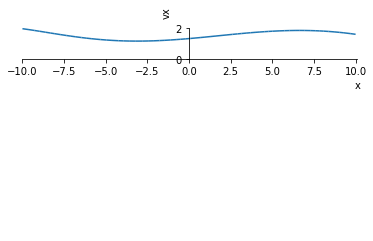

In [29]:
print('1. Solving all partial derivatives equal to 0')
variables =[a0, d1, d2]
result = solve([d_a0,d_a1,d_a2, d_a3, d_d1,d_d2], variables)
if len(result) == 0:
    print('No solutions!')
else:
    print('1. Building plot')
    vx1 = substitute(vx, variables, result[0])
    print('=' * 100)
    vx1 = substitute(vx1, [v0,v1,  H0, L], [v0_,1+v0_, H0_, L_])
    print("vx = ", vx)
    print("vx1 = ", vx1)
    print('-' * 100)
    vx1 = substitute(vx1, [y], [0])
    print("vx1 = ", vx1)
    p1 = sympy.plotting.plot(vx1, xlim=(-L_, (L_ + 0.1)), ylim=(-(10 + 1), (2+1)), ylabel='vx')

2. Building plot
vy =  0.333333333333333*y**3*(1.0*L*v1 - 2.0*a0*x)/L**2 + 1.0*y*(-1.0*H0**2*L*v1 + 2.0*H0**2*a0*x + 0.016*H0*L**2*a0*x - 0.08*H0*L**2*a0 + 0.024*H0*L*v1*x**2 - 0.16*H0*L*v1*x + 0.2*H0*L*v1 - 0.032*H0*a0*x**3 + 0.24*H0*a0*x**2 - 0.4*H0*a0*x - 6.4e-5*L**2*a0*x**3 + 0.00096*L**2*a0*x**2 - 0.0048*L**2*a0*x + 0.008*L**2*a0 + 1.0*L*v0 - 8.0e-5*L*v1*x**4 + 0.00128*L*v1*x**3 - 0.0072*L*v1*x**2 + 0.016*L*v1*x - 0.01*L*v1 + 9.6e-5*a0*x**5 - 0.0016*a0*x**4 + 0.0096*a0*x**3 - 0.024*a0*x**2 + 0.02*a0*x)/L**2
vy1 =  0.00333333333333333*y**3*(-0.84920282381291*x + 20.0) + 0.01*y*(4.07617355430197e-5*x**5 - 0.00227936225905033*x**4 + 0.0133714793370941*x**3 + 0.468475640514814*x**2 - 1.71659213137631*x - 9.25713016572648)
----------------------------------------------------------------------------------------------------
vy1 =  0.0666666666666667*y**3 - 0.0925713016572648*y
{(-1.17837579950497,), (0,), (1.17837579950497,)}
0


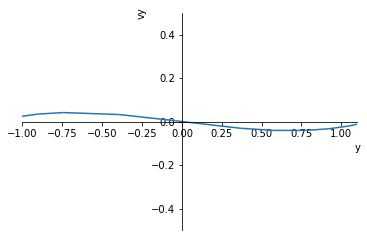

In [18]:
if len(result) == 0:
    print('No solutions!')
else:
    print('2. Building plot')
    vy1 = substitute(vy, variables, result[0])
    print('=' * 100)
    vy1 = substitute(vy1, [v0,v1,  H0, L], [v0_,1+v0_, H0_, L_])
    print("vy = ", vy)
    print("vy1 = ", vy1)
    print('-' * 100)
    vy1 = substitute(vy1, [x], [0])
    print("vy1 = ", vy1)
    print(nonlinsolve([vy1], [y]))
    print(substitute(vy1, [y], [0]))
    p2 = sympy.plotting.plot(vy1, xlim=(-1, (1 + 0.1)), ylim=(-(0.5), (0.5)), ylabel='vy')
    

In [37]:
p1 = plot((inverse(vx)), (0), (2), ylim = [-1, 10])

NameError: name 'inverse' is not defined